In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2


Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [975 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/multive

In [ ]:
!python --version

Python 3.9.16


In [ ]:
!pip install --quiet tensorflow==2.8.0
!pip install --quiet tensorflow-probability==0.15.0
!pip install --quiet tensorflow-federated==0.20.0
!pip install --quiet --upgrade nest_asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.9/819.9 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import collections
import attr
import functools
import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import tensorflow_datasets as tfds
import random
from sklearn.metrics import accuracy_score, confusion_matrix

import nest_asyncio
nest_asyncio.apply()

np.random.seed(0)

In [ ]:
tf.version.VERSION

'2.8.0'

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, GRU, concatenate
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import L2
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_auc_score
from tensorflow.keras import backend as K

In [ ]:
import pickle

# Open the file in binary mode
with open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/df_processed_2.pkl', 'rb') as file:
  # Call load method to deserialze
  df_train = pickle.load(file)

In [ ]:
import pickle

# Open the file in binary mode
with open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/df_test_processed_2.pkl', 'rb') as file:
  # Call load method to deserialze
  df_test = pickle.load(file)

In [ ]:
# Open the file in binary mode
# with open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/my_df_train_org.pkl', 'rb') as file:
#   # Call load method to deserialze
#   df_train = pickle.load(file)

In [ ]:
df_train['polarity'] = df_train['polarity'].replace(4, 1)

In [ ]:
#df_train['clean']= train_data
df_train.head()

,_id,game,sentiment,text
0,2401,Borderlands,1,im get borderland murder
1,2401,Borderlands,1,come border kill
2,2401,Borderlands,1,im get borderland kill
3,2401,Borderlands,1,im come borderland murder
4,2401,Borderlands,1,im get borderland murder


In [ ]:
np.unique(df_train['sentiment'])

array([0, 1])

In [ ]:
max_length = 100
vocab_size = 1000

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
df_train = df_train.sample(frac = 1)

#X_train, X_test, Y_train, Y_test = train_test_split (df_train['clean'],Y,test_size=0.05, random_state = 123, shuffle = True)
train_data, valid_data = train_test_split (df_train,random_state=42, stratify=df_train["sentiment"], test_size=0.2)

In [ ]:
print(f"the length of positive examples in train data is {len(train_data[train_data['sentiment']==1])}")
print(f"the length of negative examples in train data is {len(train_data[train_data['sentiment']==0])}")

the length of positive examples in train data is 16666
the length of negative examples in train data is 18033


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Reload Twitter dataset with new Vocabulary
tokenizer = Tokenizer(num_words=vocab_size,filters='@', split = " ")
tokenizer.fit_on_texts(train_data["text"])

In [ ]:
# Vectorize input text using Vocabulary
X_train_vectorized = tokenizer.texts_to_sequences(train_data['text'])
X_valid_vectorized = tokenizer.texts_to_sequences(valid_data['text'])
X_test_vectorized = tokenizer.texts_to_sequences(df_test['text'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(sequences = X_train_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_valid_padded = pad_sequences(sequences = X_valid_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')
X_test_paded = pad_sequences(sequences = X_test_vectorized, maxlen = max_length, padding = 'post', truncating = 'post')

In [ ]:
X_train_padded.shape

(34699, 100)

In [ ]:
embeddings_index = dict()
f = open('/content/drive/MyDrive/Practicum/Kilaru_OUDSA5900/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [ ]:
# Create Word Embedding Matrix
embedding_matrix = np.zeros((vocab_size, 100))
for i in range(1,vocab_size):
    embedding_vector = embeddings_index.get(tokenizer.index_word[i])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
def create_keras_model(max_length = max_length,
                       vocab_size = vocab_size,
                       embedding_matrix = embedding_matrix):
    '''
    Function to create model for tweets classification
    '''
    # defining kernel initializer and regularizer
    initializer = HeNormal()
    regularizer = L2(l2=0.01)

    # clearing backend session
    #tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential([ 
        tf.keras.layers.InputLayer(input_shape=(100,)),
        Embedding(input_dim=vocab_size,output_dim=100,input_length=max_length,weights=[embedding_matrix],trainable=False),
        #layers.SpatialDropout1D(0.2),
        layers.Bidirectional(LSTM(64)),#,name='LSTM', kernel_regularizer = regularizer,
                            #  kernel_initializer = initializer, return_sequences=False)),
        #layers.Bidirectional(LSTM(64, kernel_regularizer = regularizer,
                             #kernel_initializer = initializer)),
        #layers.GaussianNoise(stddev=0.1),
        #layers.Dense(64, activation='relu', kernel_regularizer = regularizer,
                            #kernel_initializer = initializer),
        layers.Dropout(0.5),
        layers.Dense(1, activation = "sigmoid") #, use_bias = True)
    ])
                                                      
    return model

In [ ]:
#model = create_keras_model()

In [ ]:
def Create_Clients(Data, Y, Num_Clients = 5, Client_Fst_Name = "Client"):
  train_dataset_dict = collections.OrderedDict()
  client_names = ["{}_{}".format(Client_Fst_Name, i) for i in range(Num_Clients)]

  size = len(Data)//Num_Clients

  client_dataset = {}

  for i in range(Num_Clients):
    #train = Data.iloc[i*size : (i+1) * size]
    train = Data[i*size : (i+1) * size]
    label = np.array(Y[i*size : (i+1) * size])
    #client_dataset[client_names[i]] = Data.iloc[i*size : (i+1) * size]
    #client_dataset[client_names[i]] = Data[i*size : (i+1) * size]
    train_dataset_dict[client_names[i]] = collections.OrderedDict((('features', train),('labels',label)))

  return train_dataset_dict

In [ ]:
#data_per_client = Create_Clients(list(zip(X_train_padded, df_train['polarity'])), Num_Clients= 10)
data_per_client = Create_Clients(X_train_padded, train_data['sentiment'], Num_Clients= 10)
data_per_client_valid = Create_Clients(X_valid_padded, valid_data['sentiment'], Num_Clients= 10)

In [ ]:
np.count_nonzero(data_per_client['Client_0']['labels'] == 1)

1103

In [ ]:
for client in data_per_client.keys():
  print(f"for {client}")
  print(f"the length of positive examples in train data is {np.count_nonzero(data_per_client[client]['labels'] == 1)}")
  print(f"the length of negative examples in train data is {np.count_nonzero(data_per_client[client]['labels'] == 0)}")
  print("\n")

for Client_0
the length of positive examples in train data is 1645
the length of negative examples in train data is 1824


for Client_1
the length of positive examples in train data is 1680
the length of negative examples in train data is 1789


for Client_2
the length of positive examples in train data is 1702
the length of negative examples in train data is 1767


for Client_3
the length of positive examples in train data is 1650
the length of negative examples in train data is 1819


for Client_4
the length of positive examples in train data is 1626
the length of negative examples in train data is 1843


for Client_5
the length of positive examples in train data is 1622
the length of negative examples in train data is 1847


for Client_6
the length of positive examples in train data is 1653
the length of negative examples in train data is 1816


for Client_7
the length of positive examples in train data is 1647
the length of negative examples in train data is 1822


for Client_8
the

In [ ]:
tff_dataset_train = tff.simulation.datasets.TestClientData(data_per_client)
tff_dataset_valid = tff.simulation.datasets.TestClientData(data_per_client_valid)

In [ ]:
NUM_CLIENTS = 10
NUM_EPOCHS = 3
BATCH_SIZE = 16
SHUFFLE_BUFFER = 200
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch of twitter data and return a (features, label) tuple."""
    return (tf.reshape(element['features'], [-1, 100]), 
            tf.reshape(element['labels'], [-1, 1]))

  #return dataset.batch(BATCH_SIZE).map(batch_format_fn)
  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [ ]:
federated_train_data = [preprocess(tff_dataset_train.create_tf_dataset_for_client(x))
  for x in data_per_client.keys()
]

In [ ]:
def model_fn():
  keras_model = create_keras_model(max_length, vocab_size, embedding_matrix)
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=federated_train_data[0].element_spec,
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
federated_training = tff.learning.algorithms.build_unweighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.05),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1))

In [ ]:
federated_validation = tff.learning.build_federated_evaluation(model_fn)

In [ ]:
state = federated_training.initialize()
metrics = collections.defaultdict(list)

In [ ]:
#training_metrics = collections.defaultdict(list)
#state = federated_training.initialize()
for i in range(20):
  print(f"round:- {i}")
  # client_id = list(data_per_client.keys())
  # random.shuffle(client_id)

  client_id = np.random.choice(list(data_per_client.keys()),size=6)

  federated_train_data = [preprocess(tff_dataset_train.create_tf_dataset_for_client(x))
  for x in client_id
  ]

  result = federated_training.next(state, federated_train_data)

  train_metrics = result.metrics

  state = result.state

  metrics['train_loss'].append(train_metrics['client_work']['train']['loss'])
  metrics['train_accuracy'].append(train_metrics['client_work']['train']['binary_accuracy'])

  federated_validation_data = [
        preprocess(tff_dataset_valid.create_tf_dataset_for_client(c)) for c in client_id
      ]

  model_weights = federated_training.get_model_weights(state)
  eval_result = federated_validation(model_weights, federated_validation_data)

  metrics['eval_accuracy'].append(eval_result['eval']['binary_accuracy'])
  metrics['eval_loss'].append(eval_result['eval']['loss'])

  print(f"accuracy:- {train_metrics['client_work']['train']['binary_accuracy']}, loss:- {train_metrics['client_work']['train']['loss']}")
  print(f"val_accuracy:- {eval_result['eval']['binary_accuracy']}, loss:- {eval_result['eval']['loss']}")


round:- 0
accuracy:- 0.6885910034179688, loss:- 0.5858277082443237
val_accuracy:- 0.6920415163040161, loss:- 0.5814634561538696
round:- 1
accuracy:- 0.6813362836837769, loss:- 0.5966031551361084
val_accuracy:- 0.6868512034416199, loss:- 0.5862025022506714
round:- 2
accuracy:- 0.6854040622711182, loss:- 0.5881617069244385
val_accuracy:- 0.6868512034416199, loss:- 0.5897621512413025
round:- 3
accuracy:- 0.6834182143211365, loss:- 0.589683473110199
val_accuracy:- 0.686274528503418, loss:- 0.590855062007904
round:- 4
accuracy:- 0.6892796754837036, loss:- 0.5842031240463257
val_accuracy:- 0.6941561102867126, loss:- 0.5799328088760376
round:- 5
accuracy:- 0.6886390447616577, loss:- 0.5824118256568909
val_accuracy:- 0.6920415163040161, loss:- 0.5848318934440613
round:- 6
accuracy:- 0.6838666200637817, loss:- 0.5889559388160706
val_accuracy:- 0.6849288940429688, loss:- 0.5827056169509888
round:- 7
accuracy:- 0.6887992024421692, loss:- 0.5844603776931763
val_accuracy:- 0.697808563709259, loss:-

In [ ]:
model = create_keras_model()
model_weights = federated_training.get_model_weights(state)
model_weights.assign_weights_to(model)


In [ ]:
temp = model.predict(X_train_padded)
temp = temp > 0.5
print(accuracy_score(train_data['sentiment'], np.round(temp)))
print(confusion_matrix(train_data['sentiment'], temp))

0.6980604628375457
[[12577  5456]
 [ 5021 11645]]


In [ ]:
temp = model.predict(X_valid_padded)
temp = temp > 0.5
print(accuracy_score(valid_data['sentiment'], np.round(temp)))
print(confusion_matrix(valid_data['sentiment'], temp))

0.6946397694524495
[[3134 1375]
 [1274 2892]]


In [ ]:
temp = model.predict(X_test_paded)
temp = temp > 0.5
print(accuracy_score(df_test['sentiment'], np.round(temp)))
print(confusion_matrix(df_test['sentiment'], temp))


0.6979742173112339
[[195  71]
 [ 93 184]]


In [ ]:
#new metrics
metrics

defaultdict(list,
            {'train_loss': [0.6926385,
              0.6914445,
              0.68956745,
              0.6875602,
              0.68738616,
              0.68638057,
              0.685905,
              0.68681484,
              0.68493474,
              0.6853017,
              0.6849778,
              0.68048286,
              0.6811932,
              0.68168205,
              0.67978746,
              0.6784916,
              0.6778253,
              0.6749449,
              0.67406905,
              0.66792035,
              0.6664814,
              0.664774,
              0.66155946,
              0.6558937,
              0.6515169,
              0.6500192,
              0.6555603,
              0.650553,
              0.6471243,
              0.64548695,
              0.6449382,
              0.6432337,
              0.64080733,
              0.6349244,
              0.63392675,
              0.6346808,
              0.63942957,
              0.63555413,
     

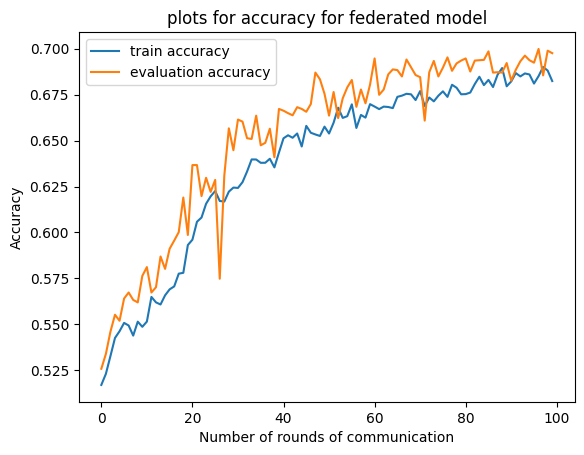

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(metrics['train_accuracy'], label = "train accuracy")
plt.plot(metrics['eval_accuracy'], label = "evaluation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of rounds of communication")
plt.title("plots for accuracy for federated model")
plt.legend()
plt.show()

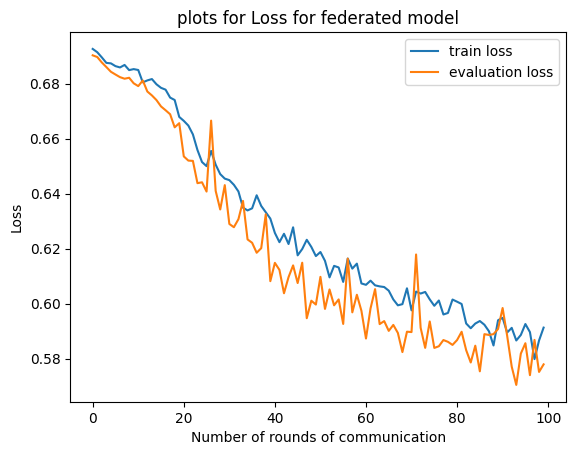

In [ ]:
plt.plot(metrics['train_loss'], label = "train loss")
plt.plot(metrics['eval_loss'], label= "evaluation loss")
plt.ylabel("Loss")
plt.xlabel("Number of rounds of communication")
plt.title("plots for Loss for federated model")
plt.legend()
plt.show()